In [30]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import re
import pandas as pd
import numpy as np
import nltk
import html5lib
import glob
import codecs
import os
import cltk
from cltk.tokenize.word import  WordTokenizer
import string

In [2]:
print ("The current working directory is", os.getcwd())

The current working directory is /Users/mateomontoya/Desktop/flaubert_NLP


In [3]:
DATA_DIR = 'data'
flaubert_fname = 'parsed.csv'
flaubert_fname = os.path.join(DATA_DIR, flaubert_fname)

In [4]:
flaubert_data = pd.read_csv(flaubert_fname)
len(flaubert_data)

4494

In [5]:
flaubert_data.head()

,chapter,folio,margins,margins_no_struck,margins_struck,metadata,previous,previous_no_struck,previous_struck,struck,text,underlined,version
0,NaN,NaN,NaN,NaN,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,Madame Bovary ____________ 19 7bre 1851.,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,NaN,1
1,NaN,2v,NaN,NaN,NaN,"I, chap 7 : La levrette Djali - brouillons, vo...",à Dieppe entendre des chanteurs Montagnards,à Dieppe entendre des chanteurs Montagnards,NaN,NaN,à Dieppe entendre des chanteurs Montagnards,NaN,1
2,1.0,3,allait puis cela en dôme tendu à 2 1 c'était d...,allait puis cela en dôme tendu à 2 1 c'était d...,ement lâche qu'il présenta au maître d'études ...,"I, chap. 1 : L'entrée de Charles au collège : ...",Madame Bovary. I. Une heure trois et demie ven...,Madame Bovary. I. Une heure et demie venaient ...,trois et le maître d'études attendait le petit...,ement lâche trois et le maître d'études attend...,allait puis cela en dôme tendu à 2 1 c'était d...,des moyens nouveau nouveau,1
3,1.0,3v,ce fut un vacarme suprême. on comme un flot dé...,ce fut un vacarme suprême. comme un flot débor...,"on puis com par peut à m alors, comme une band...","I, 1 : L'entrée de Charles au collège - Brouil...",- ce fut un vacarme suprême - les rires ... et...,- ce fut un vacarme suprême - les rires ... et...,comme veut prendre laissé un on allait ce s*/r...,"on puis com par par peut à m alors, comme une ...",ce fut un vacarme suprême. on comme un flot dé...,NaN,1
4,1.0,4,de Rouen des moyens comme toujours ainsi que d...,de Rouen ainsi que d'usage chacun Mr Roger der...,"des moyens comme toujours ""Mr Roger fort envir...","I, 1 : L'entrée de Charles au collège - Brouil...",Madame Bovary I. de Rouen Une heure et demie v...,Madame Bovary I. Une heure et demie venaient d...,de Rouen comme toujours Mr Roger l'étude des j...,de Rouen de des moyens comme toujours comme to...,Madame Bovary I. de Rouen Une heure et demie v...,des moyens nouveau et et le nouveau,1


In [6]:
flaubert_data.describe(include='O')

,folio,margins,margins_no_struck,margins_struck,metadata,previous,previous_no_struck,previous_struck,struck,text,underlined,version
count,4371,4317,4252,3742,4493,4484,4484,4323,4346,4484,2833,4494
unique,838,4203,4179,3627,4430,4437,4436,4232,4265,4435,2570,8
top,69,,&,&,"I, chap. 7 : habitudes de Charles - brouillons...",266 il marchait légèrement sourire aux lèvres ...,"269 Cependant entre les deux rangées, des mess...",i,i,"269 pas Cependant entre les deux rangées, des ...",dans,6
freq,10,52,4,8,3,3,3,13,9,3,14,640


In [7]:
flaubert_data_cleaned = flaubert_data[flaubert_data['text'].notna() == True]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(flaubert_data_cleaned['text'])

In [9]:
sparse_dtm

<4484x33659 sparse matrix of type '<class 'numpy.int64'>'
	with 871241 stored elements in Compressed Sparse Row format>

In [10]:

dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=flaubert_data_cleaned.index)
dtm['version'] = flaubert_data_cleaned['version']


In [11]:
dtm.sum().sort_values(ascending=False).head(10)

TypeError: '<' not supported between instances of 'int' and 'str'

In [12]:
dtm.mean().sort_values(ascending=False).head()

de      13.414139
la       9.406557
il       7.915923
le       6.787244
elle     6.597458
dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
tfidfvec = TfidfVectorizer()
sparse_tfidf = tfidfvec.fit_transform(flaubert_data_cleaned['text'])
sparse_tfidf

<4484x33659 sparse matrix of type '<class 'numpy.float64'>'
	with 871241 stored elements in Compressed Sparse Row format>

In [96]:
tfidf_total = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=flaubert_data_cleaned.index)
tfidf_total.head()

,00,000,05,070,10,100,1000,100fr,100v,101,...,ôte,ôter,ôté,ôtée,ûla,ût,ηναυρμε,ψdans,ψet,ψtu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
tfidf_total['version'] = flaubert_data_cleaned['version']

In [17]:
version_1 = tfidf[tfidf['version'] == '1']
version_2 = tfidf[tfidf['version'] == '2']
version_3 = tfidf[tfidf['version'] == '3']
version_4 = tfidf[tfidf['version'] == '4']
version_5 = tfidf[tfidf['version'] == '5']
version_6 = tfidf[tfidf['version'] == '6']
version_C = tfidf[tfidf['version'] == 'C']
version_D = tfidf[tfidf['version'] == 'D']

Below we are looking at the highest TF-IDF value for each edited version of Madame Bovary -- these are the most unique words of each work.

In [18]:
version_1.max(numeric_only=True).sort_values(ascending=False).head(10)

montagnards     0.636493
chanteurs       0.556231
1851            0.545226
____________    0.519860
efflanqué       0.486845
silencieuses    0.486797
planant         0.472511
nastasie        0.458772
saillant        0.457385
rapides         0.455579
dtype: float64

In [19]:
version_2.max(numeric_only=True).sort_values(ascending=False).head(10)

riboudet        0.463505
étroits         0.458599
incessamment    0.458369
épais           0.430157
origine         0.417460
aime            0.415095
fente           0.413572
diaphane        0.395969
définitif       0.390146
supposait       0.374418
dtype: float64

In [20]:
version_3.max(numeric_only=True).sort_values(ascending=False).head(10)

illis          0.591319
revinrent      0.555216
fr             0.540222
nous           0.520979
lisait         0.518452
agriculteur    0.452805
elle           0.452604
vous           0.450724
on             0.448036
100            0.438062
dtype: float64

In [21]:
version_4.max(numeric_only=True).sort_values(ascending=False).head(10)

tendon        0.579155
trône         0.526892
tu            0.509264
illis         0.478728
flacon        0.434136
bouleversé    0.420514
elle          0.417635
union         0.408990
sangsues      0.403448
fr            0.390946
dtype: float64

In [22]:
version_5.max(numeric_only=True).sort_values(ascending=False).head(10)

enlever     0.502857
vous        0.449080
fr          0.437596
tu          0.425072
294         0.411333
lenteurs    0.403337
ils         0.403239
bouquet     0.381294
st          0.355622
pilon       0.354686
dtype: float64

In [23]:
version_6.max(numeric_only=True).sort_values(ascending=False).head(10)

tu          0.506936
lisez       0.482840
vous        0.455027
cercueil    0.412646
il          0.403007
apaisés     0.379614
elle        0.362250
aurais      0.338854
de          0.330487
bridoux     0.329942
dtype: float64

In [24]:
version_C.max(numeric_only=True).sort_values(ascending=False).head(10)

lisez          0.513933
tu             0.510527
riboudet       0.414357
cours          0.400318
vous           0.393823
adieu          0.382066
agriculteur    0.367737
marquis        0.365759
vestes         0.361081
collection     0.359121
dtype: float64

In [25]:
version_D.max(numeric_only=True).sort_values(ascending=False).head(10)

adieu        0.435808
vous         0.428876
cours        0.412135
marquis      0.394885
lisez        0.382330
tu           0.373595
bridoux      0.364769
de           0.362419
riboudet     0.362349
concluait    0.360276
dtype: float64

## Analyzing TF-IDF Matrix by collected text of each version

In [65]:
def flaubert_combine_versions_on_text(data):
    versions = ['1', '2', '3', '4', '5', '6', 'C', 'D']
    
    def remove_digits(txt):
        return ''.join([ch for ch in txt if not ch.isdigit()])
    
    data['text'] = data['text'].dropna()

    version_1 = data[data['version'] == '1']
    version_2 = data[data['version'] == '2']
    version_3 = data[data['version'] == '3']
    version_4 = data[data['version'] == '4']
    version_5 = data[data['version'] == '5']
    version_6 = data[data['version'] == '6']
    version_C = data[data['version'] == 'C']
    version_D = data[data['version'] == 'D']
    
     #version 1
    version_1 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_1.text])
    print(version_1[:1000])
    version_2 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_2.text])
    version_3 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_3.text])
    version_4 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_4.text])
    version_5 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_5.text])
    version_6 = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_6.text])
    version_C = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_C.text])
    version_D = ' '.join([str(x).translate(str.maketrans('', '', string.punctuation)) for x in version_D.text])
    
    data = {'version': versions,
        'text': [version_1, version_2, version_3, version_4, version_5, version_6, version_C, version_D]}
    
    return pd.DataFrame(data=data)
    
    

In [66]:
flaubert_version = flaubert_combine_versions_on_text(flaubert_data)
flaubert_version.head()

Madame Bovary  19 7bre 1851 à Dieppe entendre des chanteurs Montagnards allait puis cela en dôme tendu à 2 1 cétait dur et côtelés régulièrement mou propre comme un melon – lâche et abandonné à son poids suivait partait ensuite une façon de sac qui se terminait par un polygone cartonné couvert dune broderie en soutache compliquée et doù pendait à distance au bout dun long cordon trop mince un petit croisillon de fils dor en manière de gland Madame Bovary I à lhorloge Une heure trois et demie venaient de sonner  et le maître du collège détudes attendait le petit coup davant le quart se préparant déjà à faire réciter les leçons  quand le proviseur entra dans létude des moyens suivi dun jeune garçon denviron quinze ans et dun dom garçon de classe qui portait un grand pupitre il était suivi dun nouveau habillé en bourgeois quil présenta au maître détudes en lui disant  dun garçon de classe qui portait un gd pupitre il y eut tout le monde se leva comme cétait lusage ceux qui dormaient se ré

,version,text
0,1,Madame Bovary 19 7bre 1851 à Dieppe entendre ...
1,2,Blainville Crevon Buchy Quincampoix la Boissiè...
2,3,259 tout lui parut être autour delle enveloppé...
3,4,296 elle avait peur den perdre qque chose où ...
4,5,III II Lestiboudois Hippolyte doit paraître ...


In [67]:
countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(flaubert_version['text'])

In [68]:
dtm_version = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=flaubert_version.index)
dtm_version.head()

,10,100,1000,10000,10001770,100fr,100v,101,1012,102,...,ôtait,ôtant,ôtaé,ôter,ôté,ôtée,ηναυρμε,ψdans,ψet,ψtu
0,4,7,0,2,0,0,0,5,1,4,...,0,0,0,1,0,0,0,0,0,0
1,3,1,0,0,0,0,1,0,0,0,...,0,0,1,3,0,0,0,0,1,0
2,1,8,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,7,3,2,0,1,0,0,0,0,0,...,3,0,0,0,1,5,0,1,1,0


In [69]:
dtm_version.sum().sort_values(ascending=False).head(10)

de      59680
la      41644
le      29979
les     27250
et      26651
il      25587
elle    21455
des     19890
en      19792
se      17984
dtype: int64

In [70]:
dtm_version.mean().sort_values(ascending=False).head(10)

de      7460.000
la      5205.500
le      3747.375
les     3406.250
et      3331.375
il      3198.375
elle    2681.875
des     2486.250
en      2474.000
se      2248.000
dtype: float64

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidfvec = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
sparse_tfidf = tfidfvec.fit_transform(flaubert_version['text'])
sparse_tfidf

<8x493976 sparse matrix of type '<class 'numpy.float64'>'
	with 729876 stored elements in Compressed Sparse Row format>

In [73]:
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=flaubert_version.index)
tfidf

,10,10 306,10 adresses,10 bourg,10 bovary,10 colère,10 demi,10 durement,10 fr,10 heures,...,ôtée bovary,ηναυρμε,ηναυρμε pardon,ψdans,ψdans allées,ψet,ψet effet,ψet lair,ψtu,ψtu banquier
0,0.001260,0.000000,0.000000,0.000000,0.000000,0.000706,0.000000,0.000000,0.000000,0.000510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000973,0.000000,0.000000,0.000726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000609,0.000000,0.000726,0.000000,0.000000
2,0.000318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000713,0.000713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000583,0.000654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000714,0.000000,0.000714,0.000517,...,0.002584,0.000000,0.000000,0.000714,0.000714,0.000599,0.000714,0.000000,0.000000,0.000000
5,0.001046,0.000000,0.000586,0.000000,0.000586,0.000000,0.000000,0.000000,0.000000,0.000424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000586,0.000586
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001033,0.000000,0.000000,...,0.000747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
tfidf.max().sort_values(ascending=False).head(100)

plus          0.356274
pr            0.352820
illis         0.248479
quil          0.237562
bien          0.232530
puis          0.206965
mr            0.188699
charles       0.183507
emma          0.176470
léon          0.176347
dun           0.175928
rodolphe      0.136330
cest          0.131776
ainsi         0.129360
dune          0.127751
bovary        0.121797
cependant     0.116123
rien          0.112486
cétait        0.112486
lon           0.111000
homais        0.110849
qq            0.108674
temps         0.105677
toute         0.103030
ah            0.101607
quelque       0.101227
toujours      0.097455
dit           0.096818
dont          0.095814
faisait       0.087641
                ...   
grand         0.057921
oui           0.057777
suisse        0.057726
pharmacien    0.057429
mère          0.057380
ensuite       0.056079
mme           0.055756
père          0.055234
lheureux      0.055191
tant          0.054723
allait        0.054670
monde         0.052979
côté       

Wants to work with Balzac and LaMartine -- style he is rebelling against and rejecting. But one of the characters is out of romantic poetry so he is mimicking that style. 

Naddaff is writing about the first exchanges of letters -- not writing Bovary but a different book -- letters are the basis of particular scenes in Bovary -- literal experiences are translated. Is the style he's using in the letters similar or different to Bovary? Developing the voice of one of his characters in the letters.

Also, looking at Colet's (his lovers) poetry at that moment.

Look at: "Ce qui est dans la coeur des femmes"

"Fleurs du midi"

"Penserosa"

"Charlotte Corday"

"La Jeunesse Mirabeau"

*Poesie Completes*

ARTFL -- 

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

In [76]:
from stop_words import get_stop_words

stop_words = get_stop_words('fr')

In [77]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=0.50,
                                   stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(flaubert_version['text'])

In [78]:
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=0.50,
                                stop_words=stop_words
                                )
tf = tf_vectorizer.fit_transform(flaubert_version['text'])

## Analyzing Topics with Latent Dirichlet Allocation

In [79]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
lda = LatentDirichletAllocation(max_iter=20, n_components=8)
lda = lda.fit(tf)

In [80]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [81]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
rouault marquis bertaux canivet boulanger vinçart taime culture mairie boc excuses sanglottait quastu laveugle rolet létude lucie dieppe boulevard camarades

Topic #1:
lhôtesse dordinaire politesses ph énergies folio pentes laissemoi gamins déménagement gênée cartes mollesses baptême flexible mâle riboudet dauberge isolée action

Topic #2:
renouvelait sépanchait flattait degré labsorbtion moux invisible fditelle sona canaille tintamarre conjugales involontaire jeté tonique dinconnu essuyer dses débène roulettes

Topic #3:
rouault bertaux marquis létude mare isolé souper av blé folio peint nastasie seules dordinaire dieppe noce rameaux servit peintes unie

Topic #4:
fr chapelle procuration succession boulevard tombeaux portail timidité duc voici cocher fournitures flèche avoua vinçart signer représente nef discrète balcon

Topic #5:
fr président boulanger mairie lestrade animaux médaille lampions multitude préfet lagriculture engrais bestiaux culture êtesvous cultivateurs ten

In [82]:
topic_dist = lda.transform(tf)
topic_dist

array([[8.22411008e-06, 8.22406508e-06, 8.21505597e-06, 9.99942445e-01,
        8.22261915e-06, 8.22330172e-06, 8.22283612e-06, 8.22278310e-06],
       [9.76423378e-06, 9.99931662e-01, 9.75421675e-06, 9.76574221e-06,
        9.76281642e-06, 9.76476901e-06, 9.76262797e-06, 9.76318310e-06],
       [8.77554147e-06, 8.77701210e-06, 8.76764126e-06, 8.77533271e-06,
        8.77428181e-06, 9.99938579e-01, 8.77573853e-06, 8.77525889e-06],
       [8.03196366e-06, 8.03070745e-06, 8.02312566e-06, 8.03147117e-06,
        8.03147542e-06, 8.03154549e-06, 9.99943787e-01, 8.03232278e-06],
       [8.36903485e-06, 8.36806147e-06, 8.36066412e-06, 8.36823270e-06,
        9.99941426e-01, 8.36790448e-06, 8.37016249e-06, 8.36983075e-06],
       [6.93534650e-06, 6.93408273e-06, 6.92791079e-06, 6.93470071e-06,
        6.93678540e-06, 6.93445474e-06, 6.93537480e-06, 9.99951461e-01],
       [9.99921284e-01, 1.12459111e-05, 1.12299372e-05, 1.12461954e-05,
        1.12474288e-05, 1.12470979e-05, 1.12471323e-05, 1.

In [83]:
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(flaubert_version).drop(columns='text')
df_w_topics

,0,1,2,3,4,5,6,7,version
0,0.000008,0.000008,0.000008,0.999942,0.000008,0.000008,0.000008,0.000008,1
1,0.000010,0.999932,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,2
2,0.000009,0.000009,0.000009,0.000009,0.000009,0.999939,0.000009,0.000009,3
3,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.999944,0.000008,4
4,0.000008,0.000008,0.000008,0.000008,0.999941,0.000008,0.000008,0.000008,5
5,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.999951,6
6,0.999921,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,C
7,0.963062,0.000010,0.000010,0.003517,0.000010,0.000010,0.000010,0.033373,D


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
melt = df_w_topics.melt('version', var_name='cols', value_name='vals')
melt.head()

,version,cols,vals
0,1,0,0.000008
1,2,0,0.000010
2,3,0,0.000009
3,4,0,0.000008
4,5,0,0.000008


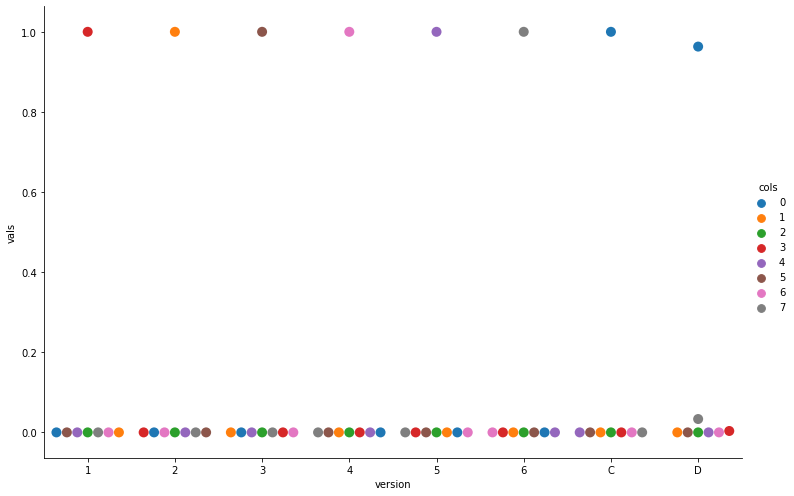

In [86]:
sns.catplot(x='version', y='vals', hue='cols', data=melt, kind='swarm', height=7, aspect=1.5, s=10);

## Analyzing LDA without separating versions first

In [194]:
tfidf_total = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=flaubert_data_cleaned.index)
tfidf_total.head()

,00,000,05,070,10,100,1000,100fr,100v,101,...,ôte,ôter,ôté,ôtée,ûla,ût,ηναυρμε,ψdans,ψet,ψtu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=0.20, stop_words=stop_words)
tf = tf_vectorizer.fit_transform(flaubert_data_cleaned['text'])

In [196]:
lda = LatentDirichletAllocation(max_iter=20, n_components=8)
lda = lda.fit(tf)

In [197]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
illis pr plus toutes puis dont autres gd faisait coup place bien enfin temps jusqu toute trois devant emma qq

Topic #1:
mr homais pr bien bovary chez fort temps puis homme gd disait plus après dit soir fit place autres trois

Topic #2:
plus toute pr place bas ainsi temps dont entre faisait tête jusqu devant toutes jour gd après vers autres yeux

Topic #3:
plus pr bien toujours chose ailleurs rien cependant toutes qque ainsi effet emma toute qq autres illis point temps disait

Topic #4:
emma puis coup cependant yeux plus tête bien enfin entre qque contre chose fit vers dit devant air rien ainsi

Topic #5:
dit ah bien non fit rien emma air pr bovary puis mr plus enfin fort bas trois yeux temps vers

Topic #6:
léon plus pr emma jour coeur homme voir femme toute yeux fort rien autres faisait dont tête disait allait puis

Topic #7:
charles emma pr bovary chez plus femme après puis soir rien bien fit enfin point voir jour allait disait ailleurs



In [198]:
topic_dist_total = lda.transform(tf)
topic_dist_frame = pd.DataFrame(data=topic_dist_total)
topic_dist_frame['version'] = flaubert_data_cleaned['version']

In [199]:
topic_dist_frame.head()

,0,1,2,3,4,5,6,7,version
0,0.062511,0.062644,0.062500,0.062509,0.062516,0.062609,0.062500,0.562211,1
1,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,1
2,0.003911,0.003919,0.601189,0.003911,0.096405,0.282841,0.003910,0.003913,1
3,0.052043,0.003792,0.552058,0.003793,0.190448,0.003797,0.003790,0.190279,1
4,0.133462,0.330596,0.349261,0.173142,0.003386,0.003389,0.003383,0.003382,1


In [200]:
len(topic_dist_frame)

4484

In [201]:
topic_dist_frame_avgs = topic_dist_frame.groupby('version').mean().reset_index()
topic_dist_frame_avgs

,version,0,1,2,3,4,5,6,7
0,1,0.073530,0.030417,0.325845,0.251855,0.080746,0.038806,0.038234,0.160567
1,2,0.047299,0.138752,0.185321,0.251362,0.086147,0.087669,0.125264,0.078186
2,3,0.062167,0.117384,0.186803,0.251108,0.124089,0.139484,0.046794,0.072171
3,4,0.100943,0.081750,0.152368,0.287621,0.111093,0.114364,0.033725,0.118137
4,5,0.106962,0.055164,0.153871,0.160082,0.122431,0.127670,0.159350,0.114470
5,6,0.100716,0.127361,0.131753,0.185543,0.134415,0.124563,0.086097,0.109552
6,C,0.012168,0.116135,0.185673,0.106188,0.160199,0.130276,0.078178,0.211182
7,D,0.081489,0.107570,0.165217,0.157355,0.148897,0.101427,0.057657,0.180387


In [202]:
melt_versions = topic_dist_frame_avgs.melt('version', var_name='cols', value_name='vals')
melt_versions = melt_versions.rename({'cols': 'topics'}, axis='columns')
len(melt_versions)

64

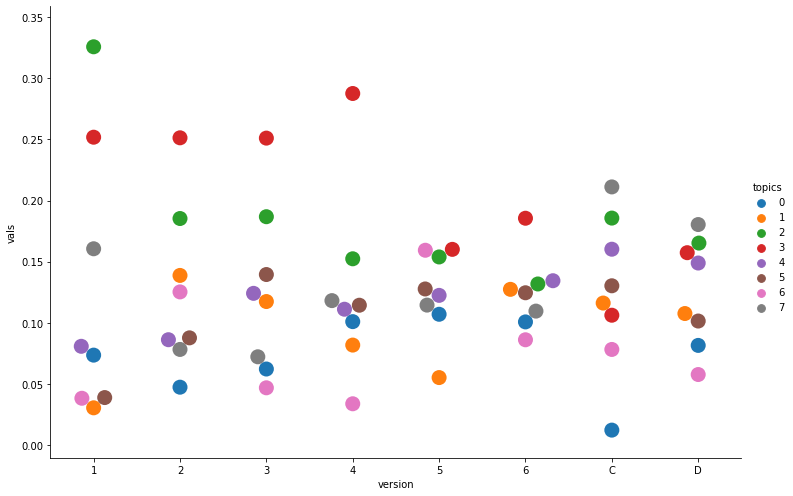

In [203]:
sns.catplot(x='version', y='vals', hue='topics', data=melt_versions, kind='swarm', height=7, aspect=1.5, s=15);

In [193]:
v1_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '1'].drop(columns='version').mean(axis=0)
v2_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '2'].drop(columns='version').mean(axis=0)
v3_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '3'].drop(columns='version').mean(axis=0)
v4_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '4'].drop(columns='version').mean(axis=0)
v5_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '5'].drop(columns='version').mean(axis=0)
v6_dist_avg = topic_dist_frame[topic_dist_frame['version'] == '6'].drop(columns='version').mean(axis=0)
vC_dist_avg = topic_dist_frame[topic_dist_frame['version'] == 'C'].drop(columns='version').mean(axis=0)
vD_dist_avg = topic_dist_frame[topic_dist_frame['version'] == 'D'].drop(columns='version').mean(axis=0)